In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv
/kaggle/input/aya-expanse/transformers/8b/1/model.safetensors.index.json
/kaggle/input/aya-expanse/transformers/8b/1/model-00003-of-00004.safetensors
/kaggle/input/aya-expanse/transformers/8b/1/config.json
/kaggle/input/aya-expanse/transformers/8b/1/model-00001-of-00004.safetensors
/kaggle/input/aya-expanse/transformers/8b/1/README.md
/kaggle/input/aya-expanse/transformers/8b/1/tokenizer.json
/kaggle/input/aya-expanse/transformers/8b/1/tokenizer_config.json
/kaggle/input/aya-expanse/transformers/8b/1/model-00004-of-00004.safetensors
/kaggle/input/aya-expanse/transformers/8b/1/special_tokens_map.json
/kaggle/input/aya-expanse/transformers/8b/1/.gitattributes
/kaggle/input/aya-expanse/transformers/8b/1/model-00002-of-00004.safetensors
/kaggle/input/aya-expanse/transformers/8b/1/generation_config.json


In [2]:
import time as tm

In [3]:
# for quantization of the model
!pip install --upgrade accelerate
!pip install --upgrade bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 13.3 MB/s eta 0:00:00


In [4]:
# pip install 'git+https://github.com/huggingface/transformers.git'
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig
import torch


In [5]:
model_input = '/kaggle/input/aya-expanse/transformers/8b/1'

tokenizer = AutoTokenizer.from_pretrained(model_input)
model = AutoModelForCausalLM.from_pretrained(model_input, device_map="auto", load_in_4bit=True, bnb_4bit_compute_dtype=torch.bfloat16)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
def hindi_inference(text):
#     templ = f'<BOS_TOKEN><|START_OF_TURN_TOKEN|><|USER_TOKEN|>{text}<|END_OF_TURN_TOKEN|><|START_OF_TURN_TOKEN|><|CHATBOT_TOKEN|>'
    messages = [{"role": "user", "content": 'You are a helpful assistant for translating text to hindi, Please give the hindi text only dont add any extra like :Here is the translation: should be like ex:कृत्रिम बुद्धिमत्ता का प्रयास करें; the text is: ' + text}]
    input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=False, return_tensors="pt")
    gen_tokens = model.generate(
        input_ids, 
        max_new_tokens=50, 
        do_sample=True, 
        temperature=0.1,
        )
#     gen_text = tokenizer.decode(gen_tokens[0])
    return tokenizer.decode(gen_tokens[0, input_ids.shape[1]:],skip_special_tokens=True)

In [7]:
def german_inference(text):
#     templ = f'<BOS_TOKEN><|START_OF_TURN_TOKEN|><|USER_TOKEN|>{text}<|END_OF_TURN_TOKEN|><|START_OF_TURN_TOKEN|><|CHATBOT_TOKEN|>'
    messages = [{"role": "user", "content": 'You are a helpful assistant for translating text to German, Please give the german text only dont add any extra like :Here is the translation: should be like ex:wasser bitte!; the text is: ' + text}]
    input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=False, return_tensors="pt")
    gen_tokens = model.generate(
        input_ids, 
        max_new_tokens=50, 
        do_sample=True, 
        temperature=0.1,
        )
#     gen_text = tokenizer.decode(gen_tokens[0])
    return tokenizer.decode(gen_tokens[0, input_ids.shape[1]:],skip_special_tokens=True)

In [8]:
def russian_inference(text):
#     templ = f'<BOS_TOKEN><|START_OF_TURN_TOKEN|><|USER_TOKEN|>{text}<|END_OF_TURN_TOKEN|><|START_OF_TURN_TOKEN|><|CHATBOT_TOKEN|>'
    messages = [{"role": "user", "content": 'You are a helpful assistant for translating text to russian, Please give the german text only dont add any extra like :Here is the translation: should be like ex:Меня зовут; the text is: ' + text}]
    input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=False, return_tensors="pt")
    gen_tokens = model.generate(
        input_ids, 
        max_new_tokens=50, 
        do_sample=True, 
        temperature=0.1,
        )
#     gen_text = tokenizer.decode(gen_tokens[0])
    return tokenizer.decode(gen_tokens[0, input_ids.shape[1]:],skip_special_tokens=True)

In [9]:
def Korean_inference(text):
#     templ = f'<BOS_TOKEN><|START_OF_TURN_TOKEN|><|USER_TOKEN|>{text}<|END_OF_TURN_TOKEN|><|START_OF_TURN_TOKEN|><|CHATBOT_TOKEN|>'
    messages = [{"role": "user", "content": 'You are a helpful assistant for translating text to korean, Please give the german text only dont add any extra like :Here is the translation: should be like ex: 안녕히 계세요; the text is: ' + text}]
    input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=False, return_tensors="pt")
    gen_tokens = model.generate(
        input_ids, 
        max_new_tokens=50, 
        do_sample=True, 
        temperature=0.1,
        )
#     gen_text = tokenizer.decode(gen_tokens[0])
    return tokenizer.decode(gen_tokens[0, input_ids.shape[1]:],skip_special_tokens=True)

In [10]:
#taking whatsapp chat dataset for testing
import pandas as pd
df = pd.read_csv('/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv')

In [11]:
df.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


In [12]:
df.shape

(52416, 5)

In [13]:
df.isnull().sum()

Unnamed: 0           3
comment_id           1
comment_parent_id    1
comment_body         1
subreddit            1
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(52412, 5)

In [16]:
new_df = pd.DataFrame()
new_df['comment_body'] = df['comment_body']

In [17]:
new_df['comment_body'][0]

"I've been shocked for days now, I don't need clickbait."

In [18]:
#randlomly select 10 rows from the df
new_df = new_df.sample(10)
new_df

,comment_body
30877,I'm not impressed with ChatGPT's results. I'm ...
48901,"interesting. mine is maine, 2021\n\nyou can un..."
13295,I have a hard time believing AI isn't there ye...
50099,this better not turn into tay 2.0
39551,"They're actors, it's all political theatre. Is..."
21972,"Hmm, isn’t socialism just a less radical versi..."
23250,> I’m not trying to prove a negative. \n\n&#x2...
14353,It does correct itself when you point mistakes...
45870,https://www.smithsonianmag.com/smart-news/us-c...
36329,We have lower level courses like that as well....


In [19]:
start = tm.time()
new_df['Hindi_comment'] = new_df['comment_body'].apply(hindi_inference)
new_df['German_comment'] = new_df['comment_body'].apply(german_inference)
new_df['Russian_comment'] = new_df['comment_body'].apply(russian_inference)
new_df['Korean_comment'] = new_df['comment_body'].apply(Korean_inference)
end = tm.time()
print(f"Took {end-start} seconds")

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1935: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1935: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct

Took 220.67611598968506 seconds


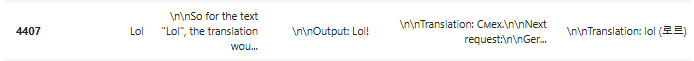

#### By this i can say that this 8b model is pretty good..

In [20]:
new_df

,comment_body,Hindi_comment,German_comment,Russian_comment,Korean_comment
30877,I'm not impressed with ChatGPT's results. I'm ...,\n\nTranslation: मुझे चैटजीपीटी के परिणामों से...,"\n\n""Ich bin von den Ergebnissen von ChatGPT n...",\nМеня не впечатляют результаты ChatGPT. Я пед...,\n\n출력: 저는 ChatGPT의 결과에 감명받지 않습니다. 저는 교육자이자 박사...
48901,"interesting. mine is maine, 2021\n\nyou can un...",\n\nOutput: \n\nआप बेकन को थोड़ा ज़्यादा पका स...,\n\nGerman translation:\n\nMan kann den Speck ...,\n\nRussian translation: \n\nВы можете недовар...,\n\nKorean translation: \n\n바게트를 너무 일찍 꺼내서 베이컨...
13295,I have a hard time believing AI isn't there ye...,\n\nTranslation: मुझे विश्वास करना मुश्किल है ...,"\n\nGerman: Es fällt mir schwer zu glauben, da...","\n\nМеня зовут; Я с трудом верю, что ИИ еще не...",\n\nKorean: AI가 아직까지 개발되지 않았다는 것을 믿기 어렵다. 매일 A...
50099,this better not turn into tay 2.0,\n\nSo please translate:\n\nकृपया इसे और तय 2....,"\n\n""Das sollte besser nicht zu Tay 2.0 werden.""",\n\nRussian: Мне не стоит превращаться в Тая 2.0.,"\n\n한국어로 번역하면: ""이것이 2.0 버전으로 변하는 것은 좋지 않아야 해."""
39551,"They're actors, it's all political theatre. Is...",\nकृत्रिम बुद्धिमत्ता का प्रयास करें;\nवे अभिन...,"\nWasser bitte!\n\nSie sind Schauspieler, es i...","\nМеня зовут. Они актеры, это весь политически...",\n안녕히 계세요.\n\n그들은 배우입니다. 모든 것이 정치 연극입니다. 다른 사람...
21972,"Hmm, isn’t socialism just a less radical versi...","\nहाँ, सामाजिक धर्म सिर्फ़ कम्युनिज़्म का एक क...","\n\nHmm, ist Sozialismus nicht einfach eine we...","\nМеня зовут.\n\nХмм, не является ли социализм...","\nHmm, 사회주의는 단순히 공산주의의 덜 급진적인 버전인가요? 그리고 공산주의로..."
23250,> I’m not trying to prove a negative. \n\n&#x2...,\n\n**Hindi अनुवाद:**\n\nमैं नकारात्मक साबित क...,"\n\nGerman translation:\n\nIch versuche nicht,...","\n\nGerman text:\n\nIch versuche nicht, eine n...","\n\nGerman text:\n\nIch versuche nicht, eine n..."
14353,It does correct itself when you point mistakes...,\nकृत्रिम बुद्धिमत्ता स्वयं को सुधारती है जब आ...,"\n\n""Es korrigiert sich selbst, wenn man Fehle...","\nМеня зовут; это исправляет себя, когда вы ук...","\n독일어 텍스트: Es korrigiert sich selbst, wenn man..."
45870,https://www.smithsonianmag.com/smart-news/us-c...,\nकृत्रिम बुद्धिमत्ता का प्रयास करें; https://...,"\n\n""Das US-Copyright-Büro entscheidet, dass K...",\n\nМеня зовут [Your Name]\n\nТекст: https://w...,"\n\n안녕히 계세요,\n\nhttps://www.smithsonianmag.com..."
36329,We have lower level courses like that as well....,\n\n**हिंदी अनुवाद:**\n\nहमारे पास भी ऐसे निम्...,\n\n**Deutsche Übersetzung:**\n\nWir haben auc...,\n\n**German Translation:**\n\nУ нас также ест...,\n\n**Translation:**\n\n우리는 그런 하위 수준 과정도 가지고 있...
